In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dermatology.data', header=None)
data.drop(index=data[33][data[33]=='?'].index, inplace=True)
data[33] = data[33].astype('int64')
data

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [3]:
x = data.drop(columns=34, axis=1).values
y = data[34].values
x, x.shape, y, y.shape

(array([[ 2,  2,  0, ...,  1,  0, 55],
        [ 3,  3,  3, ...,  1,  0,  8],
        [ 2,  1,  2, ...,  2,  3, 26],
        ...,
        [ 3,  2,  2, ...,  2,  3, 28],
        [ 2,  1,  3, ...,  2,  3, 50],
        [ 3,  2,  2, ...,  3,  0, 35]], dtype=int64),
 (358, 34),
 array([2, 1, 3, 1, 3, 2, 5, 3, 4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 5, 6, 2,
        5, 3, 5, 1, 6, 5, 2, 3, 1, 2, 1, 2, 3, 1, 2, 4, 1, 2, 5, 3, 4, 6,
        2, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 3, 1, 4, 5, 1,
        2, 6, 3, 5, 4, 2, 2, 1, 3, 5, 1, 2, 2, 2, 5, 1, 1, 3, 1, 4, 2, 2,
        5, 1, 3, 4, 2, 5, 1, 6, 2, 5, 1, 2, 2, 1, 4, 1, 3, 1, 1, 3, 5, 3,
        3, 5, 2, 3, 4, 1, 2, 5, 6, 1, 1, 2, 6, 3, 5, 4, 1, 1, 3, 5, 5, 1,
        4, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 5, 4, 2, 2, 1, 1, 1, 5, 3, 2, 3,
        2, 2, 4, 2, 3, 6, 2, 1, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 3,
        1, 1, 1, 1, 6, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2, 2, 5, 5,
        5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4

In [4]:
from keras.utils import to_categorical
y = to_categorical(y)
y

Using TensorFlow backend.


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((304, 34), (54, 34), (304, 7), (54, 7))

In [6]:
x_train.shape[1]

34

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(128, input_shape=(x_train.shape[1], )))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7))
model.add(Activation('softmax'))


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
ok = model.fit(x_train, y_train,epochs=50,validation_data=(x_test,y_test))

Train on 304 samples, validate on 54 samples
Epoch 1/50
304/304 [==============================] - 2s 8ms/step - loss: 3.1732 - accuracy: 0.1974 - val_loss: 1.4987 - val_accuracy: 0.3519
Epoch 2/50
304/304 [==============================] - 0s 170us/step - loss: 1.8147 - accuracy: 0.3717 - val_loss: 1.2572 - val_accuracy: 0.7222
Epoch 3/50
304/304 [==============================] - 0s 125us/step - loss: 1.6001 - accuracy: 0.4013 - val_loss: 1.1841 - val_accuracy: 0.4815
Epoch 4/50
304/304 [==============================] - 0s 115us/step - loss: 1.2948 - accuracy: 0.5164 - val_loss: 0.8691 - val_accuracy: 0.8519
Epoch 5/50
304/304 [==============================] - 0s 115us/step - loss: 1.1285 - accuracy: 0.5888 - val_loss: 0.7023 - val_accuracy: 0.7963
Epoch 6/50
304/304 [==============================] - 0s 122us/step - loss: 0.9282 - accuracy: 0.6480 - val_loss: 0.5246 - val_accuracy: 0.9074
Epoch 7/50
304/304 [==============================] - 0s 112us/step - loss: 0.7422 - accuracy

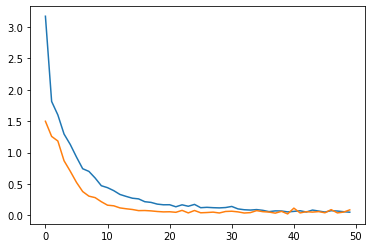

In [14]:
import matplotlib.pyplot as plt
plt.plot(ok.history['loss'])
plt.plot(ok.history['val_loss'])
plt.show()

In [17]:
model.evaluate(x_test,y_test)

54/54 [==============================] - 0s 93us/step


[0.0862192692304099, 0.9629629850387573]

In [24]:
np.unique(np.round(model.predict(x_test)) == y_test, return_counts=True)

(array([False,  True]), array([  4, 374], dtype=int64))

In [81]:
np.round(model.predict(x_test)), np.round(model.predict(x_test)) == y_test

(array([[0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0.,

In [80]:
model.predict(np.array(x_test[7]).reshape(1,34)).round(), y_test[7]

(array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [83]:
from keras.models import load_model
model.save('model9629.h5')